<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Bootcamp_DS_Mod02_Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 02 - Tratamento, exploração e visualização de dados

## Aula 05
*   Acompanhamento da Aula 05
*   Resolução dos Desafios



Olá, continuaremos nossas análises sobre os dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Nesse módulo, seguiremos as análises dos dados financeiros do SUS. Inicialmente vamos focar no tratamento e manipulação dos dados para análises mais complexas, utilizando recursos mais avançados do Pandas e da Linguagem Python como um todo. 

Teremos também a inserção de dados externos que serão utilizados para enriquecer a análise exploratória e realizar comparações mais precisas entre os diferentes estados. Além disso, discutiremos mais sobre boas práticas de visualização, interpretação de gráficos e sua construção com o Seaborn.

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Em nossa análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Para a Aula 05, exploraremos os dados relativos aos Procedimentos Hospitalares do SUS nos estados entre os anos de 2008 a 2021 e vamos nos debruçar um pouco mais nas funções de tempo do Python, para que possamos fazer buscas mais rápidas e precisas quando determinarmos certas faixas de tempo no nosso Dataframe.

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [48]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Pré-Tratamento dos dados






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

Depois, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos separar os 'ids' das unidades da federação para que apareça apenas o nome dos estados e tiraremos a coluna de totais.

In [49]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [50]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)

# Retirando a coluna de totais, separando o período de 2008 para 2021
# e ordenando pelo maior total
dados_completos = dados_completos.sort_values("Total", ascending=False)
dados_completos = dados_completos.drop("Total", axis = 1)
dados_completos = dados_completos / 1000000
dados_completos = dados_completos.iloc[:,6:]

dados_completos.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,177.09,192.41,178.64,217.01,215.13,212.91,212.72,214.08,215.27,214.25,216.12,209.18,192.16,213.51,195.79,239.41,221.20,231.92,224.04,224.16,248.76,224.12,239.35,225.64,210.71,229.15,221.66,241.45,229.92,250.82,...,259.64,279.65,254.22,285.35,286.37,291.68,279.10,286.15,295.67,277.69,302.77,278.27,266.77,291.89,268.08,287.15,292.87,309.14,281.62,307.20,303.58,294.08,303.87,282.79,273.36,303.87,272.05,277.94,255.18,314.28,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,88.93,99.02,83.68,100.26,91.83,97.29,95.72,100.05,98.98,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.84,105.49,99.67,103.37,107.84,104.34,100.53,101.94,99.54,107.77,103.15,111.08,106.09,115.49,...,138.37,146.51,130.73,151.51,150.70,153.60,150.26,156.72,160.48,146.00,157.29,148.17,145.42,153.24,142.69,151.98,157.96,163.64,154.17,166.78,161.77,157.44,166.17,152.17,152.47,158.27,141.46,147.65,127.45,142.75,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,105.56,116.13,107.08,122.33,124.73,127.08,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.46,132.61,124.87,134.71,127.17,126.20,133.87,126.22,113.57,122.33,116.13,114.78,97.78,111.01,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.14,95.86,103.04,98.57,94.37,96.97,91.01,88.76,97.61,85.49,84.88,76.81,87.78,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,43.02,60.89,40.67,52.75,48.92,51.18,57.24,53.49,51.24,48.49,48.69,49.71,44.41,55.99,44.83,54.47,78.13,56.03,51.44,53.87,57.87,53.74,52.38,50.24,50.89,74.01,61.15,55.35,55.82,59.09,...,67.38,72.45,65.06,74.43,74.58,79.42,75.99,77.58,78.92,72.87,79.19,74.02,70.83,79.66,74.14,75.06,76.86,82.67,78.69,88.18,83.62,81.56,82.53,74.78,75.15,80.41,73.15,74.60,69.44,89.73,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


### Visualização dos gastos da Bahia por mês com o SUS:




Para plotarmos o quanto o Estado da Bahia gastou por mês com o SUS precisamos ajustar nosso dataframe antes de utilizar a biblioteca do Seaborn

In [51]:
dados_mensais = dados_completos.T
dados_mensais.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Vamos plotar esses gastos em um gráfico de linhas:

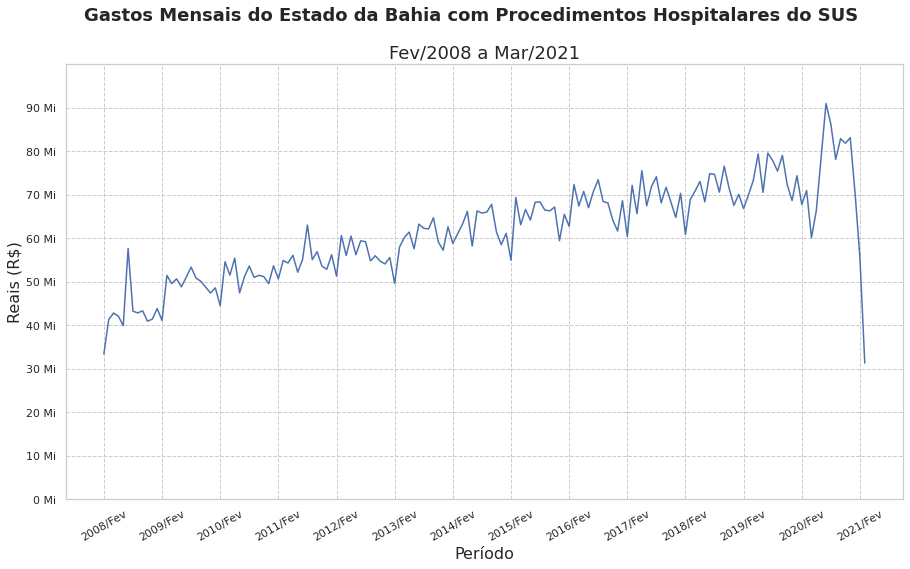

In [52]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais,x=dados_mensais.index, y="Bahia")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 100, 10))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais do Estado da Bahia com Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 100 milhões
plt.ylim(0, 100)

# Oculta as informações no topo do gráfico
plt.show()

### Tratando os dados para utilizarmos funções de tempo corretamente:




In [53]:
from datetime import date

meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)


dados_mensais.index = dados_mensais.index.map(para_dia)
dados_mensais.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Vamos plotar novamente os dados da Bahia para ver o que aconteceu com a variável de tempo em nosso Dataframe. Desta vez vamos retirar o ```set_major_locator``` para ver como ele se comportará:

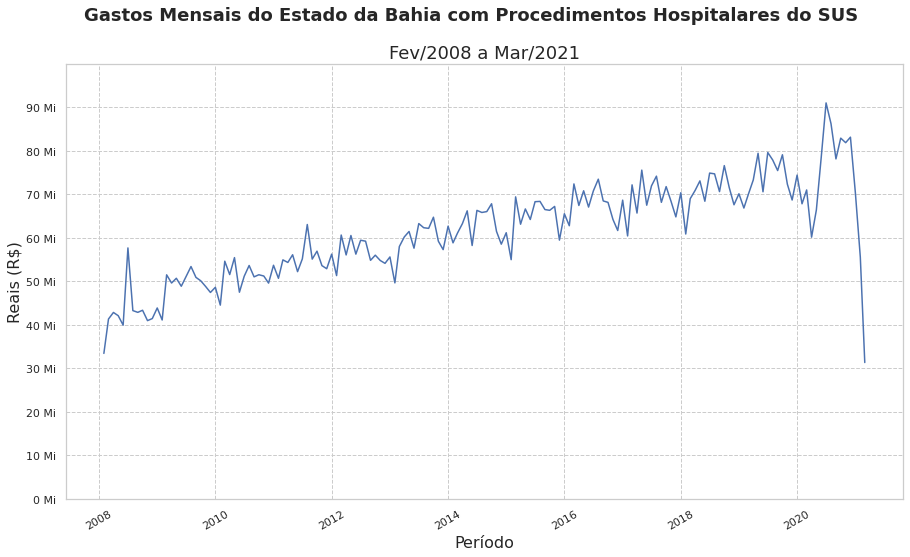

In [54]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais,x=dados_mensais.index, y="Bahia")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 100, 10))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais do Estado da Bahia com Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 100 milhões
plt.ylim(0, 100)

# Oculta as informações no topo do gráfico
plt.show()

#### Visualização de mais dados dentro do mesmo gráfico:


Inicialmente, vamos aplicar o melt para transfomar nosso Dataframe em uma tabela com o tempo, Unidade da Federação e valor.

Mas, primeiro, tiraremos a variável de tempo do index e colocaremos na primeira coluna de nossos dados:



In [55]:
dados_mensais_divididos = dados_mensais.reset_index().melt(id_vars=["index"], value_vars=dados_mensais.columns)
dados_mensais_divididos.columns = ["dia_mes_ano", "uf", "gasto"]
dados_mensais_divididos["dia_mes_ano"] = dados_mensais_divididos["dia_mes_ano"].astype('datetime64')

dados_mensais_divididos.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


##### Mini-desafio: Partindo da tabela que sofreu um melt voltar ao Dataframe:

---



In [56]:
dados_mensais_divididos.pivot(index="dia_mes_ano", columns="uf", values="gasto").head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.13,1.94,0.77,24.41,4.64,172.96,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.32,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.90,1.96,0.88,27.48,5.02,170.56,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.31,2.14,0.90,27.81,5.27,170.34,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.09,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.42,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.46,5.34
2008-06-01,2.11,10.30,1.42,8.65,39.91,29.46,11.97,11.89,20.36,14.55,9.45,10.26,79.62,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.11,2.62,0.94,28.99,4.98,175.49,5.40




---



#### Visualização de mais dados dentro do mesmo gráfico (continuação):



Para nossa visualização, eu escolhi fazer uma comparação dos 3 estados mais populosos do Nordeste: Bahia, Pernambuco e Ceará.

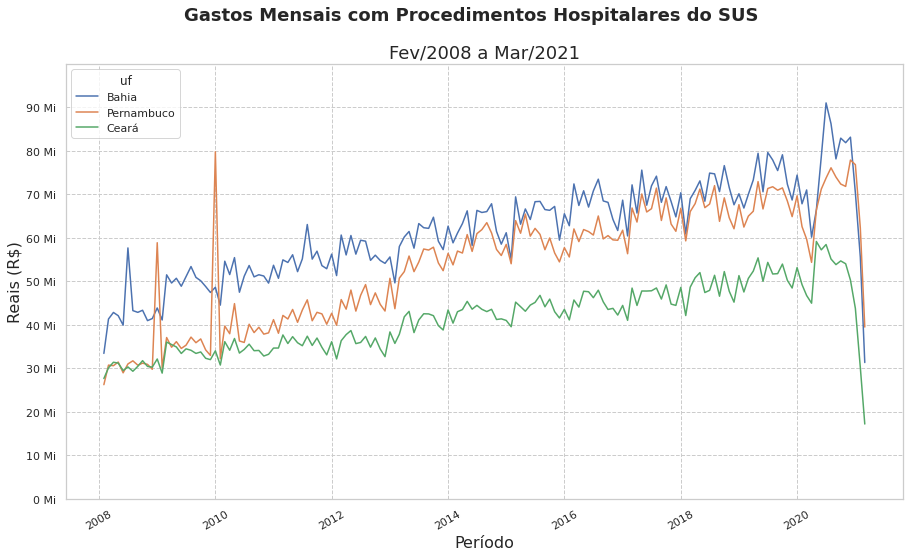

In [57]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Separando os estados BA, PE e CE:
dados_mensais_divididos_BA_PE_CE = dados_mensais_divididos.query("uf == ['Bahia','Pernambuco','Ceará']")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_BA_PE_CE, x="dia_mes_ano", y="gasto", hue="uf",)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 100, 10))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais com Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 100 milhões
plt.ylim(0, 100)

# Oculta as informações no topo do gráfico
plt.show()

Analisando brevemente os dados dos três estados, podemos notar uma pequena evolução nos gastos com o passar dos anos no período de 2008 a 2021, com uma alta queda no início do ano 2021, que talvez possa ser explicada por ainda não ter todos os dados dos procedimentos ainda disponíveis.

É possível notar que também os mesmos estados tem uma tendência bem similar, salvo dois grandes picos em Pernambuco no ano de 2009 e 2010. Seria necessário buscar um pouco mais para descobrir o porquê dessa alta tão signifcativa nos gastos de Pernambuco. Este período compreende os surtos da epidemia de H1N1(2009) e as enchentes na Região da Mata (2010 a 2011) que podem talvez ter certa influência nos números, mas seria necessário investigar esse caso.

Outra curiosidade demonstra que os gastos de Pernambuco, que nos primeiros 4 anos de nossa análise seguia mais os gastos do Ceará, entre os anos de 2012 até o dado momento está muito próximo dos gastos da Bahia. Ou seja, houve um crescimento relativamente alto em 2013 até o patamar dos gastos do governo da Bahia e este prosseguiu lado a lado até os dias atuais. 

#### Comparando gastos ano a ano

Primeiro vamos separar em duas colunas os meses e anos:

In [58]:
dados_mensais_divididos["mes"] = dados_mensais_divididos["dia_mes_ano"].dt.month
dados_mensais_divididos["ano"] = dados_mensais_divididos["dia_mes_ano"].dt.year

dados_mensais_divididos.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.96,2,2008
1,2008-03-01,São Paulo,170.56,3,2008
2,2008-04-01,São Paulo,170.34,4,2008
3,2008-05-01,São Paulo,172.46,5,2008
4,2008-06-01,São Paulo,175.49,6,2008


Agora, vamos separar os estados da Bahia e do Paraná, como estados em regiões e climas diferentes, para analisar se há uma grande diferença no comportamento dos gastos com o SUS. Primeiro, faremos o gráfico dos gastos da Bahia com Procedimentos Hospitalares no SUS por mês a cada ano, de 2008 a 2021:

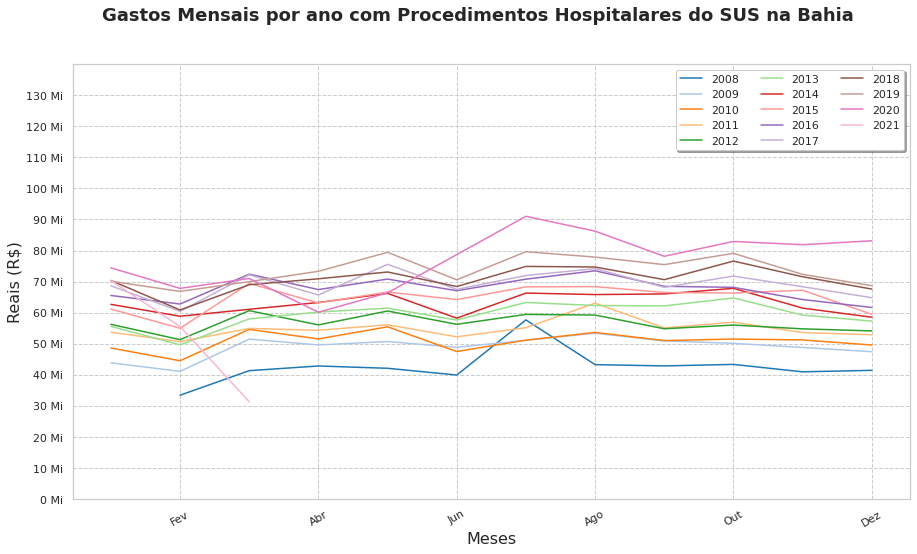

In [97]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(15, 8))

# Separando o estado da BA:
dados_mensais_divididos_BA = dados_mensais_divididos.query("uf == 'Bahia'")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_BA, x="mes", y="gasto", hue="ano", palette='tab20')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 140, 10))
ax.set_xticks(range(2,13,2))
ax.set_xticklabels([mes for mes in meses if meses[mes] % 2 == 0])

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais por ano com Procedimentos Hospitalares do SUS na Bahia",
             size = 18, weight='bold')
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Meses", fontdict={'fontsize': 16})
plt.legend(loc='best', ncol=3, shadow=True, fancybox=True)
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 140 milhões
plt.ylim(0, 140)

# Oculta as informações no topo do gráfico
plt.show()

Agora, faremos o mesmo processo, só que agora com o Estado do Paraná:

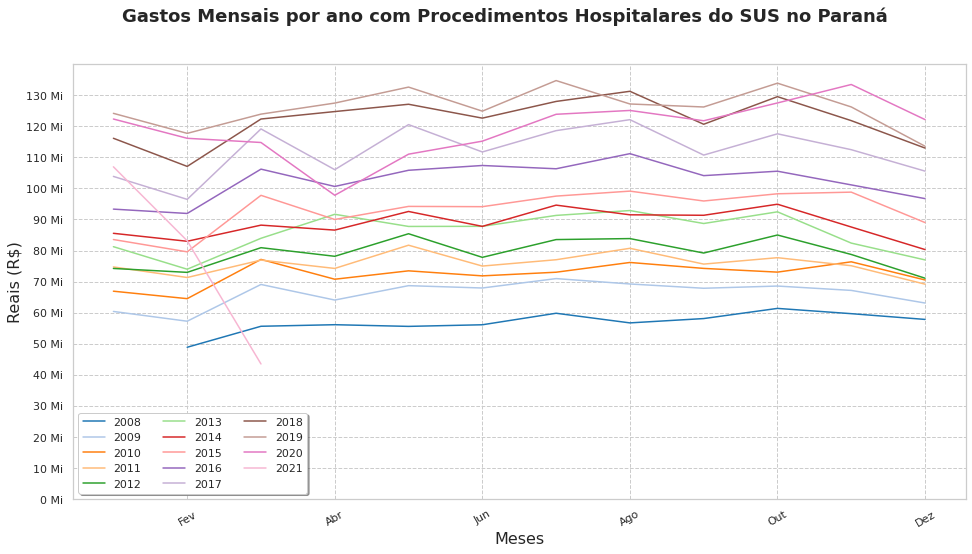

In [96]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(16, 8))

# Escolhendo o Paraná como um estado de clima diferente):
dados_mensais_divididos_PR = dados_mensais_divididos.query("uf == 'Paraná'")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_PR, x="mes", y="gasto", hue="ano", palette='tab20')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 140, 10))
ax.set_xticks(range(2,13,2))
ax.set_xticklabels([mes for mes in meses if meses[mes] % 2 == 0])

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais por ano com Procedimentos Hospitalares do SUS no Paraná",
             size = 18, weight='bold')
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Meses", fontdict={'fontsize': 16})
plt.legend(loc='best', ncol=3, shadow=True, fancybox=True)
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 140 milhões
plt.ylim(0, 140)

# Oculta as informações no topo do gráfico
plt.show()

O Paraná tem maiores gastos totais com o SUS do que a Bahia. Uma semelhança que podemos notar entre os estados ao observar os gráficos é de que normalmente nos meses correspondentes ao verão temos uma redução dos gastos em relação a outros meses do ano, salvo alguns casos como 2020 no Paraná. 